# Péndulo intervertido.

Parámetros:



(M)       mass of the cart                         0.5 kg

(m)       mass of the pendulum                     0.2 kg

(b)       coefficient of friction for cart         0.1 N/m/sec

(l)       length to pendulum center of mass        0.3 m

(I)       mass moment of inertia of the pendulum   0.006 kg.m^2

(F)       force applied to the cart

(x)       cart position coordinate

(theta)   pendulum angle from vertical (down)


## Esquema

![Pendulo invertido](pendulum2.png)

## Ecuaciones linealizadas:

$$
\left[{\begin{array}{c}
  \dot{x}\\ \ddot{x}\\ \dot{\phi}\\ \ddot{\phi}
\end{array}}\right] =
\left[{\begin{array}{cccc}
  0&1&0&0\\
  0&\frac{-(I+ml^2)b}{I(M+m)+Mml^2}&\frac{m^2gl^2}{I(M+m)+Mml^2}&0\\
  0&0&0&1\\
  0&\frac{-mlb}{I(M+m)+Mml^2}&\frac{mgl(M+m)}{I(M+m)+Mml^2}&0
\end{array}}\right]
\left[{\begin{array}{c}
  x\\ \dot{x}\\ \phi\\ \dot{\phi}
\end{array}}\right]+
\left[{\begin{array}{c}0\\
  \frac{I+ml^2}{I(M+m)+Mml^2}\\
  0 \\
  \frac{ml}{I(M+m)+Mml^2}
\end{array}}\right]u$$

$${\bf y} =
\left[{\begin{array}{cccc}
  1&0&0&0\\0&0&1&0
\end{array}}\right]
\left[{\begin{array}{c}
  x\\ \dot{x}\\ \phi\\ \dot{\phi}
\end{array}}\right]+
\left[{\begin{array}{c}
  0\\0
\end{array}}\right]u$$

In [1]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [2]:
M = 0.5
m = 0.2
b = 0.1
I = 0.006
g = 9.8
l = 0.3
p = I*(M+m)+M*m*l**2;

In [3]:
A = np.matrix([[0, 1, 0,0],
     [0, -(I+m*l**2)*b/p,  (m**2*g*l**2)/p, 0],
     [0, 0, 0,  1],
     [0, -(m*l*b)/p, m*g*l*(M+m)/p, 0]])

B =np.matrix([[0],
     [(I+m*l**2)/p],
          [0],
        [m*l/p]])

C = np.matrix([[1, 0, 0, 0],
     [0, 0, 1, 0]])

D = np.matrix([[0],
               [0]])

states = ['x', 'x_dot', 'phi', 'phi_dot']
inputs = ['u']
outputs = ['x', 'phi']

pendulo = ctrl.ss(A,B,C,D, states=states, inputs=inputs, outputs=outputs)
pendulo

<LinearIOSystem:sys[2]:['u']->['x', 'phi']>

In [4]:
p1 = -10 + 10j;
p2 = -10 - 10j;
p3 = -50;
p4 = -40;
p_obj1= [p1, p2, p3,p4]

K1 = ctrl.place(A,B,p_obj1);
sys_cl1 = ctrl.ss(A-B*K1,B,C,0,);

sys_cl1.pole()

array([-50. +0.j, -40. +0.j, -10.+10.j, -10.-10.j])

Text(0, 0.5, 'Angular Posicion (rad)/ Posicion (m)')

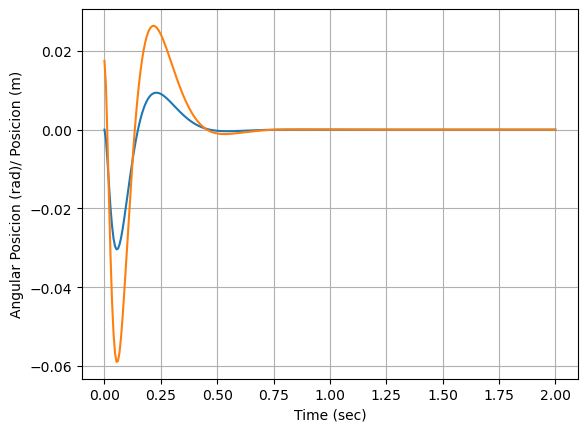

In [5]:
n = 300
tf = 2#24.0
#plt.rcParams['animation.html'] = 'html5'
time = np.linspace(0,tf,n)

#t = np.arange(0,2,0.01)
u = np.zeros(time.size)
x0 = [0, 0, np.radians(1), 0]

t1,y1,x1 =ctrl.forced_response(sys_cl1,U=u,T=time,X0=x0,return_x=True)
x=y1[0,:];
theta_a=y1[1,:];
plt.plot(t1,x)#pos
plt.plot(t1,theta_a)#angulo en rad
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Angular Posicion (rad)/ Posicion (m)')

In [9]:
#Defining the time, we will go beyond the 6.2s
#to check if the objective was achieved

#plt.rcParams['animation.html'] = 'html5'
#################################
#Weight of item
m2 = np.ones(n)


x1 = x
y1 = np.zeros(len(time))

#suppose that l = 1
x2 = 1*np.sin(theta_a)+x1
x2b = 1.05*np.sin(theta_a)+x1
y2 = 1*np.cos(theta_a)-y1
y2b = 1.05*np.cos(theta_a)-y1

plt.plot(time,x2)
plt.grid()

In [8]:
%matplotlib qt5

# Pendulum animation by Everton Colling

fig = plt.figure(figsize=(8,6.4))
ax = fig.add_subplot(111,autoscale_on=False,\
                     xlim=(-1.8,0.8),ylim=(-0.4,1.2))
ax.set_xlabel('position')
ax.get_yaxis().set_visible(False)

crane_rail, = ax.plot([-2.0,1.0],[-0.2,-0.2],'k-',lw=4)
start, = ax.plot([-1,-1],[-1.5,1.5],'k:',lw=2)
objective, = ax.plot([0,0],[-0.5,1.5],'k:',lw=2)
mass1, = ax.plot([],[],linestyle='None',marker='s',\
                 markersize=40,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
mass2, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)
line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.05,0.9,'',transform=ax.transAxes)
wgt_template = 'weight = %.1f'
wgt_text = ax.text(0.75,0.9,'',transform=ax.transAxes)
start_text = ax.text(-1.06,-0.3,'start',ha='right')
end_text = ax.text(0.06,-0.3,'objective',ha='left')

def init():
    mass1.set_data([],[])
    mass2.set_data([],[])
    line.set_data([],[])
    time_text.set_text('')
    wgt_text.set_text('')
    return line, mass1, mass2, time_text, wgt_text

def animate(i):
    mass1.set_data([x1[i]],[y1[i]-0.1])
    mass2.set_data([x2b[i]],[y2b[i]])
    line.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % time[i])
    wgt_text.set_text(wgt_template % m2[i])
    return line, mass1, mass2, time_text, wgt_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,len(time)), \
         interval=40,blit=False,init_func=init)

# requires ffmpeg to save mp4 file
#  available from https://ffmpeg.zeranoe.com/builds/
#  add ffmpeg.exe to path such as C:\ffmpeg\bin\ in
#  environment variables
#ani_a.save('Pendulum_Control.mp4',fps=30)
#ani_a.save('animation.gif', writer='PillowWriter', fps=30)
plt.show()